In [1]:
import pandas as pd
import numpy as np
import multiprocessing as mp
from time import time

In [2]:
random=np.random.rand(20000,100)
#random=np.random.randint(0,10,size=(20000,100))
df=pd.DataFrame(random*10,index=np.arange(20000), columns=np.arange(100))
print(df)

             0         1         2         3         4         5         6   \
0      1.995663  2.733004  9.591430  1.555129  2.347076  2.617027  1.509625   
1      7.212119  9.186777  3.441082  5.879513  5.993437  8.650022  4.039121   
2      7.679356  9.523710  3.511532  3.688731  8.393281  5.074707  7.686867   
3      5.765760  2.673514  9.746294  4.962363  8.938030  1.934494  5.613224   
4      1.082173  5.699921  6.213848  1.992381  9.087399  2.815092  3.567251   
...         ...       ...       ...       ...       ...       ...       ...   
19995  0.656303  0.492655  6.949724  4.068269  9.368922  8.427169  1.228709   
19996  8.372521  8.786306  0.623157  7.455466  5.690432  8.275290  0.111234   
19997  8.079012  7.932064  0.046353  4.742260  2.612251  6.213497  6.310720   
19998  3.249132  3.086752  8.178746  6.114098  7.593956  1.670391  0.062685   
19999  0.738223  7.088233  8.827278  5.766210  6.458584  7.557864  2.569442   

             7         8         9   ...        90 

In [3]:
def mse(df):
   #result=np.sqrt(sum([np.min(df,axis=0)**2,np.max(df,axis=0)**2]))
   result=np.sqrt(sum([np.min(df)**2,np.max(df)**2]))
   #print(mp.current_process())
   return result

In [4]:

def parallel(df):
    mseval=[]
    for i in range(df.shape[1]):
      #min,max=pool.apply(minmax,args=[df[i]])
      result=pool.apply(mse,args=[df[i]])
      mseval.append(result)
    print(mseval) 
    #return mse



In [10]:
elapsedtime=[]
speedup=[]
cpus=[1,2,4,8]
efficiency=[]
for processes in cpus:
      pool = mp.Pool(processes)
      t1 = time()
      parallel(df)
      pool.close()
      t2 = (time()-t1)
      print('\nPool Parallelism runs %0.3f seconds on %s CPUs.\n' % (t2, processes))
      elapsedtime.append(t2)
      speed=elapsedtime[0]/t2
      speedup.append(speed)
      print('\nspeed is ',speed, 'times on', processes, 'cpus')
      print('\n\n')
print(elapsedtime)

[9.999816756827268, 9.999763945519803, 9.999393287518451, 9.999805673672787, 9.999838068303141, 9.999678737578067, 9.9995806868665, 9.999673000550096, 9.999421165613828, 9.999992751442871, 9.999991668790594, 9.999252671425536, 9.999814178201946, 9.999369359353317, 9.99930613619581, 9.999236162063438, 9.999739962160914, 9.999849110837939, 9.999996307892859, 9.99979597707506, 9.999918300995093, 9.999361927191284, 9.999386772345249, 9.999941838386407, 9.999338298521511, 9.999522427371556, 9.999250247946264, 9.99990428503989, 9.999563692786314, 9.999803642517817, 9.999410166886857, 9.999931340088697, 9.999495317435853, 9.99952623128065, 9.999855270783925, 9.998905374854251, 9.999723262070866, 9.999174479552122, 9.99980187663913, 9.999751205343019, 9.999611644566478, 9.999990959881334, 9.99964608210309, 9.998630254095245, 9.99984994023762, 9.99978261162235, 9.999407438369936, 9.999166869587189, 9.99960061919382, 9.997505616099668, 9.999661995605889, 9.99848247338942, 9.999759270254382, 9.99

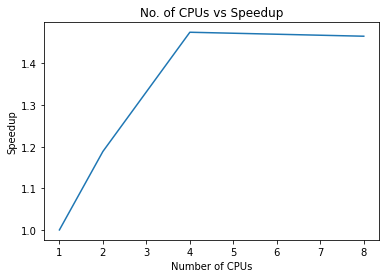

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(cpus, speedup)
plt.title("No. of CPUs vs Speedup")
plt.ylabel("Speedup")
plt.xlabel("Number of CPUs")
plt.savefig("CPUs_vs_Speedup.png")